In [1]:
# Bike Sharing Assignment 

===================== Data Preparation =====================

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression


In [3]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#convert categorical variables to strings

In [26]:
data['weathersit'] = data['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow, Light Rain', 4:'Heavy Rain'})
data['season'] = data['season'].map({1: 'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [6]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# dropping casual and registered columns

In [8]:
data = data.drop(columns=['casual','registered'])

In [9]:
#check for missing values

In [10]:
print("missing values:\n", data.isnull().sum())

missing values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


=========================== EDA =============================

In [11]:
# Univariate Analysis

Text(0.5, 1.0, 'Distribution of Bike Rentals')

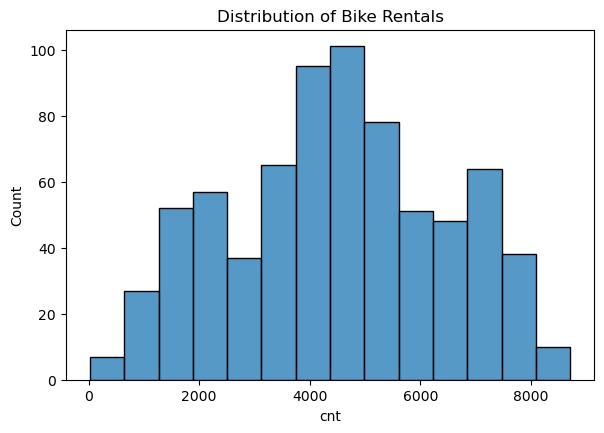

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data['cnt'])
plt.title('Distribution of Bike Rentals')

In [18]:
# Bivariate Analysis

Text(0.5, 1.0, 'Bike Rentals by Season')

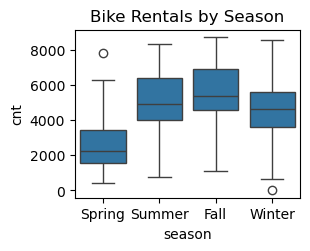

In [19]:
plt.subplot(2,2,2)
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Bike Rentals by Season')

In [21]:
# Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

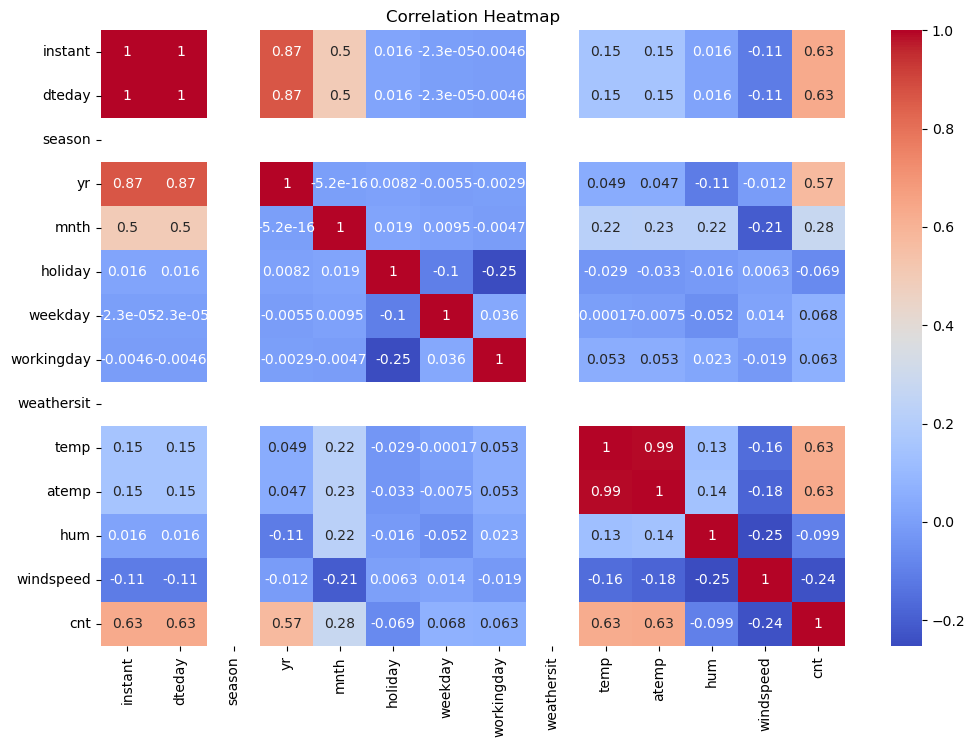

In [27]:
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [29]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [30]:
# creating dummy variab;es for categorical features

In [54]:
data_encoded = pd.get_dummies(data, columns=['season','weathersit'], drop_first=True)

In [55]:
data_encoded

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114
726,727,2019-12-28,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095
727,728,2019-12-29,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341
728,729,2019-12-30,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796


In [ ]:
# Feature Selection


In [59]:
X = data_encoded.drop(columns=['cnt', 'dteday','instant'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,yr,1.950585
1,mnth,5.045507
2,holiday,1.098089
3,weekday,3.086777
4,workingday,3.259004
5,temp,491.131557
6,atemp,550.480623
7,hum,13.538693
8,windspeed,5.087727


In [62]:
# Drop feature with high VIF

In [64]:
features_to_drop = vif_data[vif_data['VIF']>5]['feature'].tolist()
X = X.drop(columns= features_to_drop)

In [65]:
# p-values calculation

In [67]:
y = data_encoded['cnt']
f_values,p_values = f_regression(X, y)
p_values = pd.Series(p_values, index= X.columns)
print(p_values)

yr            4.745374e-64
holiday       6.332413e-02
weekday       6.820873e-02
workingday    9.130713e-02
dtype: float64


In [69]:
#Dropping features with higher p-values

In [70]:
features_to_drop = p_values[p_values > 0.05].index.tolist()
X = X.drop(columns = features_to_drop)
X

,yr
0,0
1,0
2,0
3,0
4,0
...,...
725,1
726,1
727,1
728,1


============================ Model Building =============================

In [39]:
# Spliting the dataset into training and testing sets

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Scaling the features

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Model Building

In [48]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
model

LinearRegression()

In [50]:
X_test_scaled

array([[ 0.97630797, -0.75617576, -0.18338026, ...,  0.04511477,
        -0.92754839,  0.06103826],
       [-1.02426696, -0.46430092, -0.18338026, ...,  0.83376697,
         1.29375495,  0.36874989],
       [-1.02426696,  0.99507333, -0.18338026, ..., -0.98536875,
        -0.07771083, -0.13010358],
       ...,
       [-1.02426696,  0.41132363, -0.18338026, ...,  1.45046066,
         0.83074107,  0.20232282],
       [-1.02426696, -0.46430092, -0.18338026, ...,  0.43164425,
         1.07690159, -0.79503657],
       [-1.02426696,  0.70319848, -0.18338026, ...,  0.06082549,
         0.42340167, -0.10516157]])

In [51]:
y_test

468    7460
148    4788
302    3331
355    3068
515    7338
       ... 
404    3830
390    4075
218    3785
135    3958
260    4274
Name: cnt, Length: 146, dtype: int64

In [72]:
#Model Evaluation

In [73]:
#Prediction on test set

In [75]:
y_pred = model.predict(X_test_scaled)

In [76]:
# Calculate R-Squared Score

In [79]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared score is: {r2}')

R-squared score is: 0.7721958937725794


In [80]:
# Reporting


In [82]:
# Actual v/s Predicted values plot

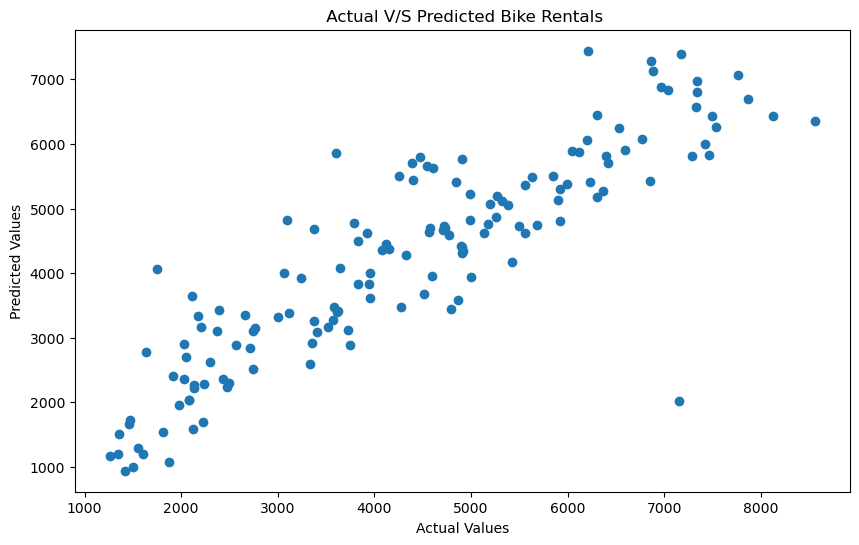

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(' Actual V/S Predicted Bike Rentals')
plt.show()